### Notebook Summary

* Compute the duration of each clip (in second)
* Histograms of clip durations

**Note:** The audio clips are of variable lengths or duration. The signal lengths have to be matched (somehow) for any kind of comparioson or processing. We start by exploring the signals and then find way to obtain comparable signals. Clip durations are not equally distributed in the test and training data. For example, most dog barking clips in the test set have shoter durations. 

### Imports and Paths

In [2]:
import sys
from os import path
import glob
from os import listdir

import numpy as np
import random

**For playing audio clips in `wav` format**

In [3]:
from IPython.display import Audio
import scipy.io.wavfile as wave
import wave
import contextlib

**For plotting and visualization**

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm
import mpld3

In [5]:
BASE_DIR = "/Users/susmitadatta/Projects/AudioClassification_CatDog/"
SUPMOD_DIR = BASE_DIR+"SupportModules/"
sys.path.append(path.abspath(SUPMOD_DIR))
import par_dirpath as PAR

**Directory paths are defined in the parameter file.**

In [6]:
DATA_DIR = PAR.DATA_DIR
CODE_DIR = PAR.CODE_DIR
SUPMOD_DIR = PAR.SUPMOD_DIR

TRAIN_CAT_DIR = PAR.TRAIN_CAT_DIR
TRAIN_DOG_DIR = PAR.TRAIN_DOG_DIR
TEST_CAT_DIR = PAR.TEST_CAT_DIR
TEST_DOG_DIR = PAR.TEST_DOG_DIR

### Clip Durations

The script in the following cell access training and test data for cats and dogs and computers their duration in second.  

The length or duration of a clip is equal to the number of frames divided by the framerate (frames per second).

In [7]:
path_names = [TRAIN_CAT_DIR, TRAIN_DOG_DIR, TEST_CAT_DIR, TEST_DOG_DIR]

clip_duration_sec = []
for path in path_names:
    for clip in glob.glob(path+"*.wav"):
        with contextlib.closing(wave.open(clip,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            clip_duration_sec.append(duration)
sorted_clip_duration_sec = sorted(clip_duration_sec)

### Visualize Clip Durations

Functions for plots

In [17]:
def barPlot(x, y, bar_width=0.5):
    plt.style.use('ggplot')
    fig,ax = plt.subplots(1, figsize=(12, 4))
    plt.bar(x, y, bar_width, color="#0A6665")
    plt.title("Clips Ordered by Duration", fontsize=20, fontname="Times New Roman")
    ax.set_ylabel("Clip Duration (sec)", fontsize=14, fontname="Times New Roman")
    ax.set_xlabel("Clips", fontsize=14, fontname="Times New Roman")
    ax.set_xticklabels([])
    plt.show()

    
    
def histPlot(data, n_bins=50):
    fig,ax = plt.subplots(1, figsize=(12, 4))
    n, bins, patches = plt.hist(data, bins=n_bins, width = 0.25, normed=False, color="#0A6665")
    plt.ylabel("Frequency", fontsize=14, fontname="Times New Roman")
    plt.xlabel("Clip Duration [sec]", fontsize=14, fontname="Times New Roman")
    plt.show()

    
    
def histCombPlot_1(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=50):
    
    c1, c2, c3, c4 = ['#0A6665', "#6CBBDB", "#ED9033", "#C89AC6"]
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    
    # plot: Un-normalized histogram
    n, bins, patches = \
    ax[0, 0].hist(trn_cat, bins=n_bins, range=[0, 20], normed=False, color=c1)
    ax[0, 0].legend(['cat (train)'] )
    ax[0, 0].set_xlabel("Meow Clip Duration [sec]", fontsize=12, fontname="Times New Roman")
    ax[0, 0].set_ylabel("Frequency", fontsize=12, fontname="Times New Roman")
    ax[0, 0].set_title("Normalized Histogram", fontsize=14, fontname="Times New Roman")
    
    n, bins, patches = \
    ax[0, 1].hist(trn_cat, bins=n_bins, range=[0, 20], normed=False, color=c2)
    ax[0, 1].legend(['dog (train)'] )
    ax[0, 1].set_xlabel("Bark Clip Duration [sec]", fontsize=12, fontname="Times New Roman")
    ax[0, 1].set_ylabel("Frequency", fontsize=12, fontname="Times New Roman")
    ax[0, 1].set_title("Normalized Histogram", fontsize=14, fontname="Times New Roman")
    
    n, bins, patches = \
    ax[1, 0].hist(tst_cat, bins=n_bins, range=[0, 20], normed=False, color=c3)
    ax[1, 0].legend(['cat (test)'] )
    ax[1, 0].set_xlabel("Meow Clip Duration [sec]", fontsize=12, fontname="Times New Roman")
    ax[1, 0].set_ylabel("Frequency", fontsize=12, fontname="Times New Roman")
    
    n, bins, patches = \
    ax[1, 1].hist(tst_dog, bins=n_bins, range=[0, 20], normed=False, color=c4)
    ax[1, 1].legend(['dog (test)'] )
    ax[1, 1].set_xlabel("Bark Clip Duration [sec]", fontsize=12, fontname="Times New Roman")
    ax[1, 1].set_ylabel("Frequency", fontsize=12, fontname="Times New Roman")

    
    
def histCombPlot_2(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=50):
    """
    histogram plot style: stacked step unfilled
    """
    c1, c2, c3, c4 = ['#0A6665', "#6CBBDB", "#ED9033", "#C89AC6"]
    
    fig, ax = plt.subplots(1,2,figsize=(12,4))

    # plot: Unnormalized histogram
    n, bins, patches = \
    ax[0].hist(trn_cat, bins=n_bins, range=[0, 20], normed=False, color=c1, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[0].hist(trn_dog, bins=bins, alpha=1, normed=False, color=c2, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[0].hist(tst_cat, bins=bins, alpha=1, normed=False, color=c3, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[0].hist(tst_dog, bins=bins, alpha=1, normed=False, color=c4, histtype='step', stacked=True, fill=False)
    
    ax[0].legend(['cat (train)', 'dog (train)', 'cat (test)', 'dog (test)'] )
    ax[0].set_xlabel("Clip Duration [sec]", fontsize=14, fontname="Times New Roman")
    ax[0].set_ylabel("Frequency", fontsize=14, fontname="Times New Roman")
    ax[0].set_title("Un-normalized Histogram", fontsize=16, fontname="Times New Roman")
    
    # plot: Unnormalized histogram
    n, bins, patches = \
    ax[1].hist(trn_cat, bins=n_bins, range=[0, 20], normed=True, color=c1, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[1].hist(trn_dog, bins=bins, alpha=1, normed=True, color=c2, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[1].hist(tst_cat, bins=bins, alpha=1, normed=True, color=c3, histtype='step', stacked=True, fill=False)
    
    n, bins, patches = \
    ax[1].hist(tst_dog, bins=bins, alpha=1, normed=True, color=c4, histtype='step', stacked=True, fill=False)
    
    ax[1].legend(['cat (train)', 'dog (train)', 'cat (test)', 'dog (test)'] )
    ax[1].set_xlabel("Clip Duration [sec]", fontsize=14, fontname="Times New Roman")
    ax[1].set_ylabel("Frequency", fontsize=14, fontname="Times New Roman")
    ax[1].set_title("Normalized Histogram", fontsize=16, fontname="Times New Roman")
    

    
    
def histCombPlot_3(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=50):
    """
    histogram plot style: stacked step unfilled
    """
    c1, c2, c3, c4 = ['#0A6665', "#6CBBDB", "#ED9033", "#C89AC6"]
    
    fig, ax = plt.subplots(1,2,figsize=(12, 4))

    # plot: Unnormalized histogram
    n, bins, patches = \
    ax[0].hist(trn_cat, bins=n_bins, range=[0, 20], normed=False, color=c1)
    
    n, bins, patches = \
    ax[0].hist(trn_dog, bins=bins, alpha=1, normed=False, color=c2)
    
    n, bins, patches = \
    ax[0].hist(tst_cat, bins=bins, alpha=1, normed=False, color=c3)
    
    n, bins, patches = \
    ax[0].hist(tst_dog, bins=bins, alpha=1, normed=False, color=c4)
    
    ax[0].legend(['cat (train)', 'dog (train)', 'cat (test)', 'dog (test)'] )
    ax[0].set_xlabel("Clip Duration [sec]", fontsize=14, fontname="Times New Roman")
    ax[0].set_ylabel("Frequency", fontsize=14, fontname="Times New Roman")
    ax[0].set_title("Un-normalized Histogram", fontsize=16, fontname="Times New Roman")
    
    # plot: Normalized histogram
    n, bins, patches = \
    ax[1].hist(trn_cat, bins=n_bins, range=[0, 20], normed=True, color=c1)
    
    n, bins, patches = \
    ax[1].hist(trn_dog, bins=bins, alpha=1, normed=True, color=c2)
    
    n, bins, patches = \
    ax[1].hist(tst_cat, bins=bins, alpha=1, normed=True, color=c3)
    
    n, bins, patches = \
    ax[1].hist(tst_dog, bins=bins, alpha=1, normed=True, color=c4)
    
    ax[1].legend(['cat (train)', 'dog (train)', 'cat (test)', 'dog (test)'] )
    ax[1].set_xlabel("Clip Duration [sec]", fontsize=14, fontname="Times New Roman")
    ax[1].set_ylabel("Frequency", fontsize=14, fontname="Times New Roman")
    ax[1].set_title("Normalized Histogram", fontsize=16, fontname="Times New Roman")

**Durations of all clips**

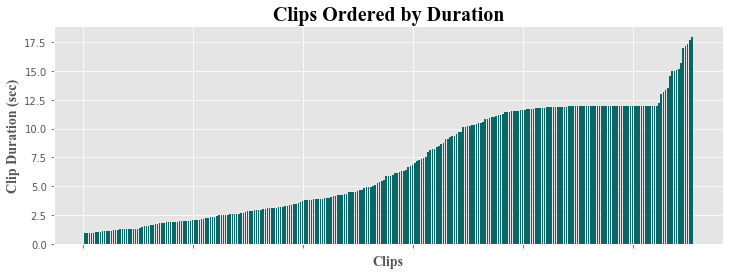

In [11]:
y = sorted_clip_duration_sec
x = range(1, len(y)+1)
bar_width = 0.7
barPlot(x, y, bar_width)

**Histogram of all clips (test and training data of both cats and dogs)**

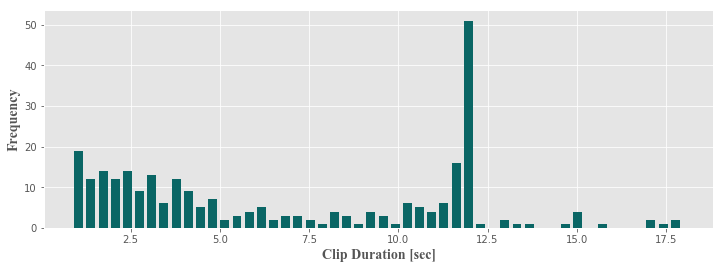

In [18]:
hist_data = clip_duration_sec
histPlot(hist_data, n_bins=50)

**Separate training and test data of cats and dogs**

In [19]:
trn_cat = clip_duration_sec[0:125]
trn_dog = clip_duration_sec[125:125+85]
tst_cat = clip_duration_sec[125+85:125+85+39]
tst_dog = clip_duration_sec[125+85+39:]

**Histogram of cat/dog - train/test separately**

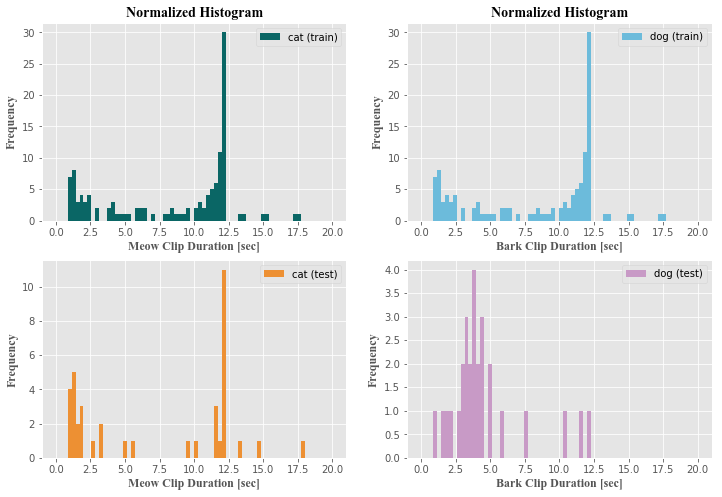

In [20]:
histCombPlot_1(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=70)

**Histogram of cat/dog - train/test overlaid**

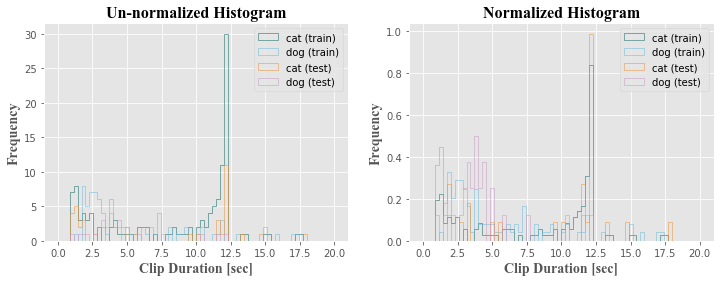

In [22]:
histCombPlot_2(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=70)

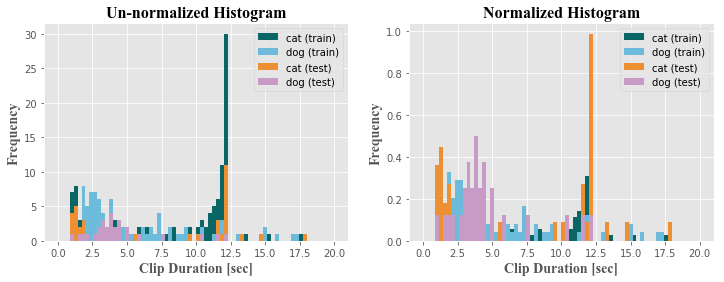

In [23]:
histCombPlot_3(trn_cat, trn_dog, tst_cat, tst_dog, n_bins=70)